# Assignment10: Use the following link to source your data for the exercise on Sales Conversion
Optimization: https://www.kaggle.com/loveall/clicks-conversion-tracking.

# Qn-1: Import the libraries and load the data.

In [19]:
#Import Libraries
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Load Dataset
sales = pd.read_csv("sales.csv")
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
sales.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [4]:
sales.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
sales.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

# Qn-2: Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.

In [6]:
categorical_features = ['gender']
continuous_features = ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion']

In [7]:
sales[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


In [8]:
for col in categorical_features:
    dummies = pd.get_dummies(sales[col], prefix=col)
    X = pd.concat([sales, dummies], axis=1)
    X.drop(col, axis=1, inplace=True)
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,708746,916,103916,30-34,15,7350,1,1.43,2,1,0,1
1,708749,916,103917,30-34,16,17861,2,1.82,2,0,0,1
2,708771,916,103920,30-34,20,693,0,0.00,1,0,0,1
3,708815,916,103928,30-34,28,4259,1,1.25,1,0,0,1
4,708818,916,103928,30-34,28,4133,1,1.29,1,1,0,1


# Qn-3: Using a heat map to show the correlation in the data.

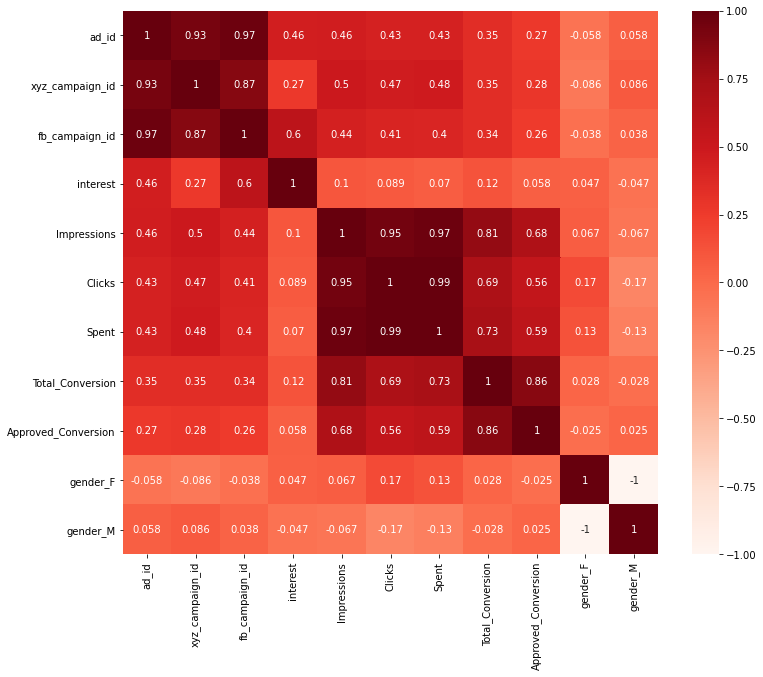

In [9]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
X=X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age'], axis = 1)
X.head()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,15,7350,1,1.43,2,1,0,1
1,16,17861,2,1.82,2,0,0,1
2,20,693,0,0.00,1,0,0,1
3,28,4259,1,1.25,1,0,0,1
4,28,4133,1,1.29,1,1,0,1


The columns were dropped because they have the least correlations with other featues and also the age feature wasnot captured in the correlation map

# Qn4-a: Using the elbow method; Determine the best number of clusters for the data in the range of 2 to 20. Also include the graphical plot for the elbow curve.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

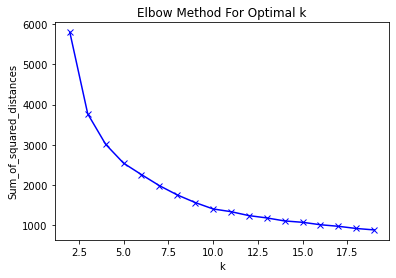

In [22]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best number of clusters in the range(2,20) is six(6)

# Qn-5: Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [26]:
km = KMeans(n_clusters = 6, init='k-means++')
km.fit(X_transformed)


KMeans(n_clusters=6)

# Qn-6: Use the model to predict the labels from the data and save them to variable y_means.

In [24]:
y_means = km.predict(X_transformed)
frame = pd.DataFrame(X_transformed)
frame['cluster'] = y_means
frame['cluster'].value_counts()

1    436
2    426
3     89
4     88
0     77
5     27
Name: cluster, dtype: int64

# Qn-7: Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

In [27]:
sales['Advert_Type']=y_means
sales.head(50)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,1
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,1
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,1


# Qn-8: Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:

# Qn-8a:Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

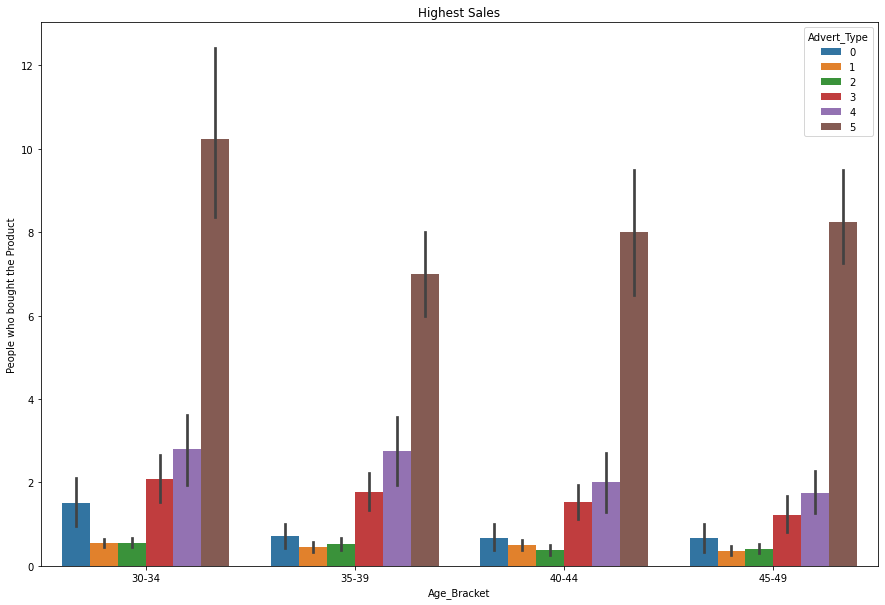

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x="age", y="Approved_Conversion", hue="Advert_Type",data=sales)
plt.title("Highest Sales")
plt.xlabel("Age_Bracket")
plt.ylabel("People who bought the Product")
plt.show()

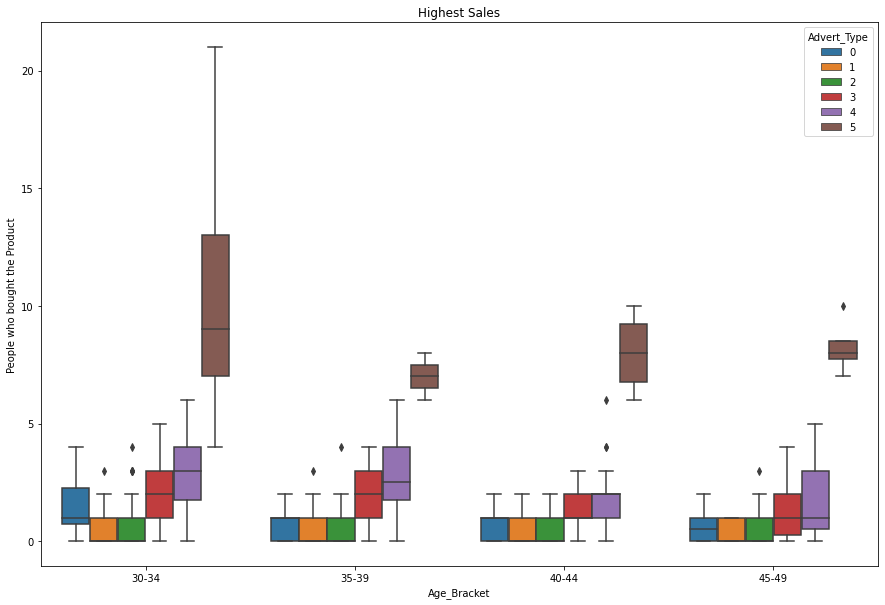

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(x="age", y="Approved_Conversion", hue="Advert_Type",data=sales)
plt.title("Highest Sales")
plt.xlabel("Age_Bracket")
plt.ylabel("People who bought the Product")
plt.show()

It can be observed from the bar and box distributions above that advert in cluster Advert_Type(5) led to the highest and consistent amount of sales by customers of all the age brackets.

# Qn-8b: Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

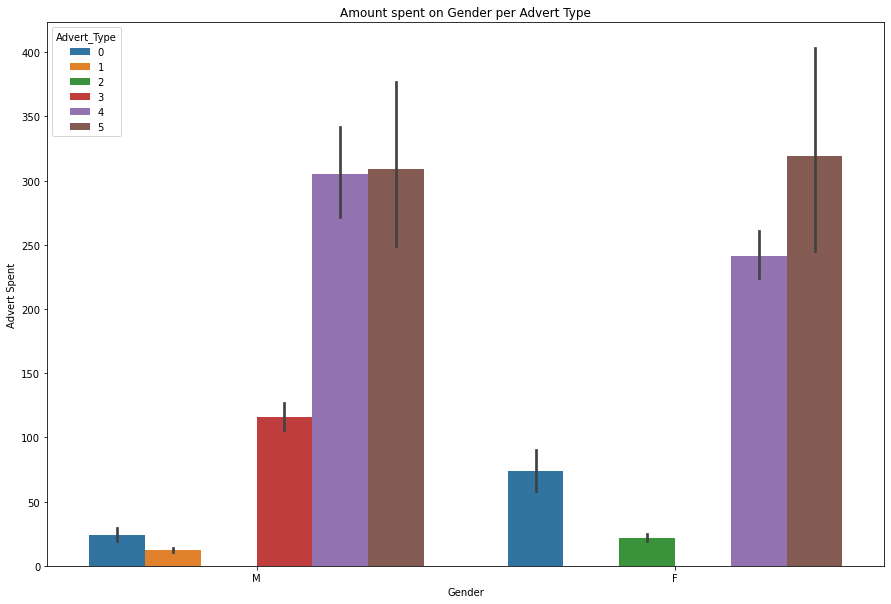

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x="gender", y="Spent", hue="Advert_Type",data=sales)
plt.title("Amount spent on Gender per Advert Type")
plt.xlabel("Gender")
plt.ylabel("Advert Spent")
plt.show()

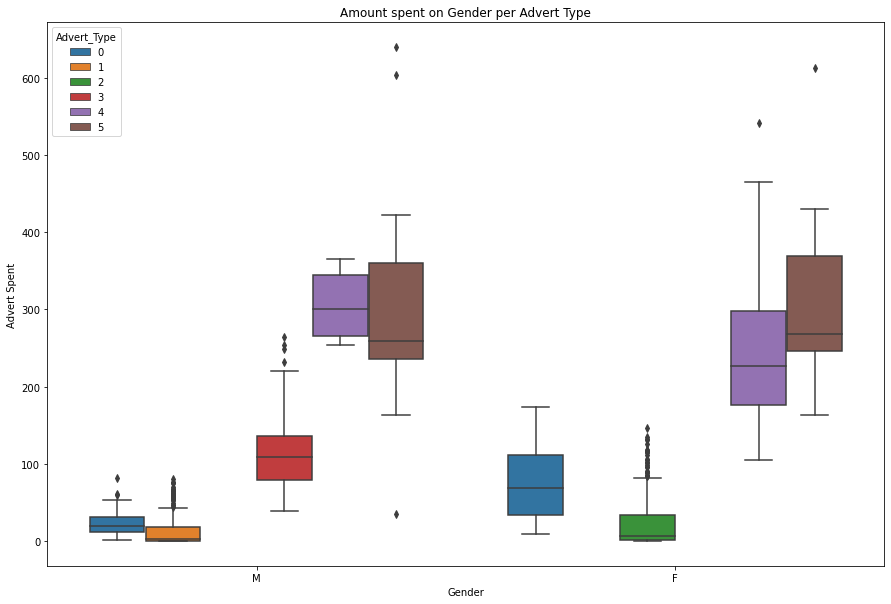

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(x="gender", y="Spent", hue="Advert_Type",data=sales)
plt.title("Amount spent on Gender per Advert Type")
plt.xlabel("Gender")
plt.ylabel("Advert Spent")
plt.show()

From the bar and box distributions above it can be observed that the company xyz have no gender bias in their ad spending.

It is also observed that the company spends heavily in advert types 4 and 5 for both Male and Female

# Qn-9: Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.

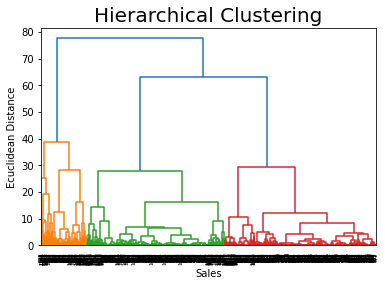

In [33]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Hierarchical Clustering', fontsize = 20)
plt.xlabel('Sales')
plt.ylabel('Ecuclidean Distance')
plt.show()

By using  the Hierachical clustering using Dendrogam, its observed that the number of useable clusters is around 6 which is similar to K-means Clustering